Co-current heat exchange: Plot X, T, Ta the length of the
reactor.

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def ozgenc(Y,V):
    Ta, X, T = Y
    
    Cpc = 28
    m = 500
    Ua = 5000
    Cao = 1.86 #kmol/m3
    Fao = 0.9*163*0.1
    deltaH = -34500 #kJ/kmol
    k = 31.1*np.exp((7906)*(T-360)/(T*360))
    Kc = 3.03 * np.exp((deltaH/8.314)*((T-333)/(T*333)))
    Xe = Kc/(1+Kc)
    ra = -k*Cao*(1-(1+1/Kc)*X)
    Cpo = 159
    rate = -ra
    
    dTadV = Ua * (T-Ta)/m/Cpc
    dXdV = -ra/Fao
    dTdV = ((ra*deltaH)-Ua*(T-Ta))/Cpo/Fao
    return [dTadV, dXdV, dTdV]

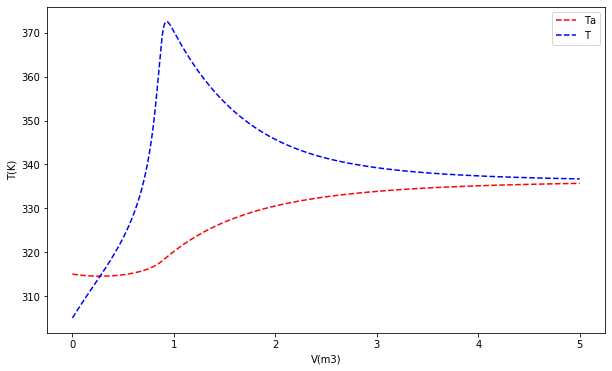

In [26]:
V = np.linspace(0,5,5000)
Y0 = [315, 0, 305]

y = odeint(ozgenc, Y0, V)

dTadV = y[:,0]
dXdV = y[:,1]
dTdV = y[:,2]

plt.figure(figsize=(10,6))
plt.plot(V,dTadV, "r--", label="Ta")
plt.plot(V,dTdV, "b--", label="T")
plt.xlabel("V(m3)")
plt.ylabel("T(K)")
plt.legend()


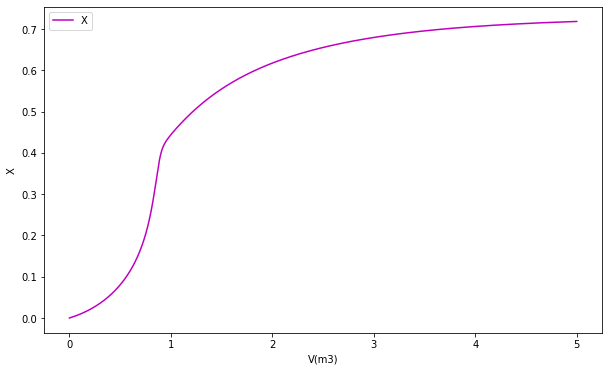

In [27]:
plt.figure(figsize=(10,6))
plt.plot(V,dXdV, "m-", label="X")
plt.xlabel("V(m3)")
plt.ylabel("X")
plt.legend()

In [28]:
print("Conversion is", round(y[:,1].max(),2))

Conversion is 0.72
